# 1. **구로구와 강남구의 IT업체 수와 근로자는 얼마나 될까?**

In [1]:
import pandas as pd
df = pd.read_csv('정보통신업_사업체_종사자수.csv')

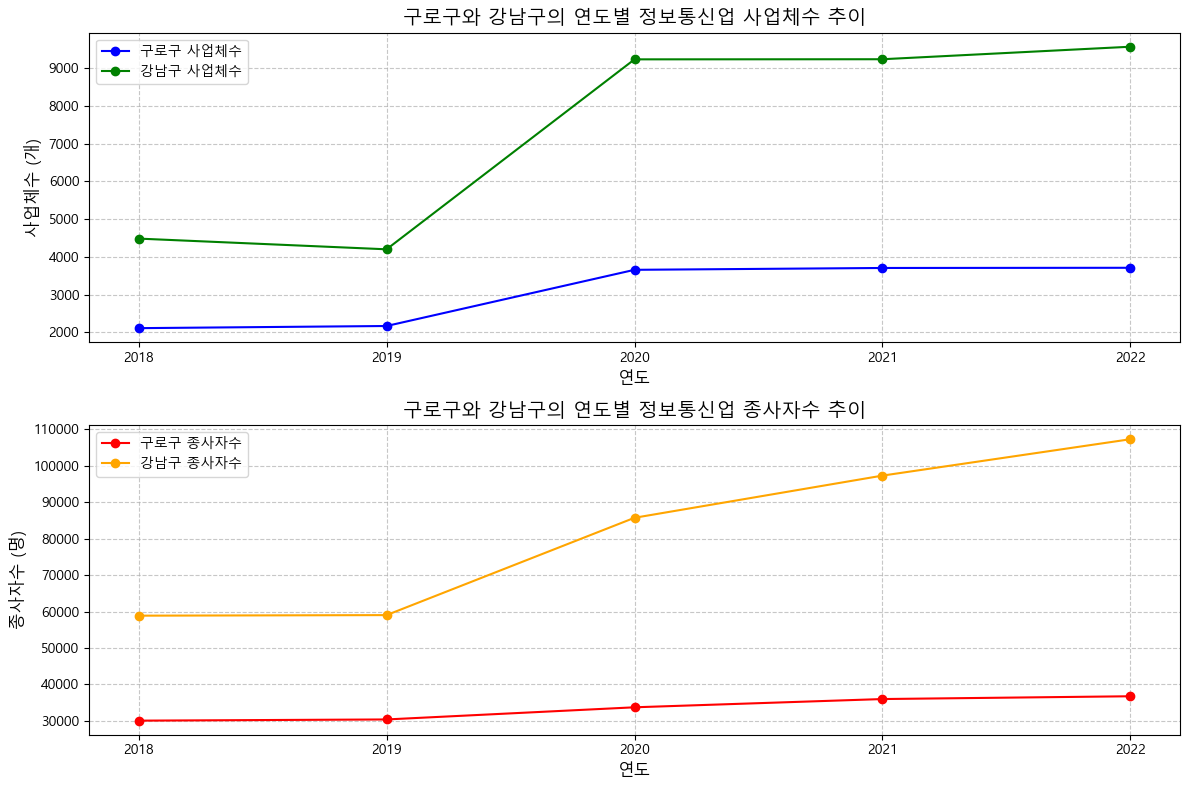

In [2]:
import matplotlib.pyplot as plt

# 그래프 설정 및 한글 폰트 적용
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 설정

# 그래프 생성
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# 구로구와 강남구 데이터 필터링
df_guro = df[df['동별(2)'] == '구로구']
df_gangnam = df[df['동별(2)'] == '강남구']

# 구로구와 강남구 사업체수 추이
axes[0].plot(df_guro['시점'], df_guro['사업체수 (개)'], label='구로구 사업체수', marker='o', color='blue')
axes[0].plot(df_gangnam['시점'], df_gangnam['사업체수 (개)'], label='강남구 사업체수', marker='o', color='green')
axes[0].set_title('구로구와 강남구의 연도별 정보통신업 사업체수 추이', fontsize=14)
axes[0].set_xlabel('연도', fontsize=12)
axes[0].set_ylabel('사업체수 (개)', fontsize=12)
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].set_xticks(df_guro['시점'])

# 구로구와 강남구 종사자수 추이
axes[1].plot(df_guro['시점'], df_guro['종사자수 (명)'], label='구로구 종사자수', marker='o', color='red')
axes[1].plot(df_gangnam['시점'], df_gangnam['종사자수 (명)'], label='강남구 종사자수', marker='o', color='orange')
axes[1].set_title('구로구와 강남구의 연도별 정보통신업 종사자수 추이', fontsize=14)
axes[1].set_xlabel('연도', fontsize=12)
axes[1].set_ylabel('종사자수 (명)', fontsize=12)
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].set_xticks(df_guro['시점'])

# 그래프 레이아웃 조정
plt.tight_layout()

# 그래프 출력
plt.show()

1. **강남구**
   - 사업체 수가 19년도 이후 큰 폭으로 증가하였고, 이에 따라 종사자 수도 2만명가량 증가함
   - 코로나 시기 이후로는 증가폭이 감소하였으며 22년도에는 20년도에 비해 소폭 상승하였음
   - 22년도 기준 구로구에 비해 사업체수는 약 2배 이상이며 종사자수는 약 2.75배 많음 
     
2. **구로구**
   - 구로구 사업체 수도 10년도에 약 2배 가량 상승하였으나 코로나 이후 동일한 수준을 유지하고 있다.
   - 종사자수는 19년도 이후 꾸준히 상승하였고 22년도에 4만명에 약간 못미치는 수준
  
**=>사업체와 종사자 수를 볼때 구로구보다 강남구에 대한 선호도가 높음을 확인할 수 있음.**

# **2. 해당 지역에 근무하는 사람들은 주로 어느 지역에 거주할까?**

In [3]:
import pandas as pd
# 출근 목적 이동 필터링한 생활이동 데이터 로드
df = pd.read_csv('2409_생활이동.csv')
df

origin_hdong_cd  dest_hdong_cd origin_hdong_nm dest_hdong_nm  \
0               11410640       11110530           홍제제3동           사직동   
1               11710580       11710710            송파1동          잠실6동   
2               11440610       11440555             염리동           아현동   
3               11740550       11740550           고덕제1동         고덕제1동   
4               11380625       11410585             역촌동           신촌동   
...                  ...            ...             ...           ...   
8623375         11110615       11110615     종로1.2.3.4가동   종로1.2.3.4가동   
8623376         11110650       11110615             혜화동   종로1.2.3.4가동   
8623377         11380520       11500615           불광제1동          우장산동   
8623378         11590540       11140520           상도제2동           소공동   
8623379         11200560       11560535           행당제1동          영등포동   

          etl_ymd  st_time_cd  fns_time_cd  move_dist  move_time    cnt  
0        20240901         840          900     3373.0       18.0   2.20  
1        20240901        1200         1300     1250.0        9.0   3.03  
2        20240901        1720         1720      447.0        5.0   2.83  
3        20240901           0            0      100.0        8.0   3.75  
4        20240901        1100         1200     5575.0       42.0   3.04  
...           ...         ...          ...        ...        ...    ...  
8623375  20240930         840          920      765.0       39.0   8.97  
8623376  20240930         800          820     2130.0       26.0  10.53  
8623377  20240930         600          800    10822.0       62.0   3.62  
8623378  20240930         720          740     7691.0       33.0   2.93  
8623379  20240930        1100         1200    12524.0       73.0   2.41  

[8623380 rows x 10 columns]

In [4]:
# 시군구 코드와 시군구명을 데이터 프레임으로 변환
sgg_data = {
    'sgg_cd': [11110, 11140, 11170, 11200, 11215, 11230, 11260, 11290, 11305, 11320, 11350, 11380, 11410, 11440, 11470,
               11500, 11530, 11545, 11560, 11590, 11620, 11650, 11680, 11710, 11740],
    'sgg_nm': ['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구', '노원구',
               '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구', '관악구',
               '서초구', '강남구', '송파구', '강동구']
}
sgg_df = pd.DataFrame(sgg_data)

# origin_hdong_cd와 dest_hdong_cd의 앞 5자리 추출
df['origin_sgg_cd'] = df['origin_hdong_cd'] // 1000
df['dest_sgg_cd'] = df['dest_hdong_cd'] // 1000

# 시군구명 매핑 수행
df = df.merge(sgg_df, left_on='origin_sgg_cd', right_on='sgg_cd', how='left').rename(columns={'sgg_nm': 'sgg_nm_origin'})
df = df.merge(sgg_df, left_on='dest_sgg_cd', right_on='sgg_cd', how='left').rename(columns={'sgg_nm': 'sgg_nm_dest'})

# 불필요한 컬럼 제거
df.drop(columns=['sgg_cd_x', 'sgg_cd_y'], inplace=True)

df

origin_hdong_cd  dest_hdong_cd origin_hdong_nm dest_hdong_nm  \
0               11410640       11110530           홍제제3동           사직동   
1               11710580       11710710            송파1동          잠실6동   
2               11440610       11440555             염리동           아현동   
3               11740550       11740550           고덕제1동         고덕제1동   
4               11380625       11410585             역촌동           신촌동   
...                  ...            ...             ...           ...   
8623375         11110615       11110615     종로1.2.3.4가동   종로1.2.3.4가동   
8623376         11110650       11110615             혜화동   종로1.2.3.4가동   
8623377         11380520       11500615           불광제1동          우장산동   
8623378         11590540       11140520           상도제2동           소공동   
8623379         11200560       11560535           행당제1동          영등포동   

          etl_ymd  st_time_cd  fns_time_cd  move_dist  move_time    cnt  \
0        20240901         840          900     3373.0       18.0   2.20   
1        20240901        1200         1300     1250.0        9.0   3.03   
2        20240901        1720         1720      447.0        5.0   2.83   
3        20240901           0            0      100.0        8.0   3.75   
4        20240901        1100         1200     5575.0       42.0   3.04   
...           ...         ...          ...        ...        ...    ...   
8623375  20240930         840          920      765.0       39.0   8.97   
8623376  20240930         800          820     2130.0       26.0  10.53   
8623377  20240930         600          800    10822.0       62.0   3.62   
8623378  20240930         720          740     7691.0       33.0   2.93   
8623379  20240930        1100         1200    12524.0       73.0   2.41   

         origin_sgg_cd  dest_sgg_cd sgg_nm_origin sgg_nm_dest  
0                11410        11110          서대문구         종로구  
1                11710        11710           송파구         송파구  
2                11440        11440           마포구         마포구  
3                11740        11740           강동구         강동구  
4                11380        11410           은평구        서대문구  
...                ...          ...           ...         ...  
8623375          11110        11110           종로구         종로구  
8623376          11110        11110           종로구         종로구  
8623377          11380        11500           은평구         강서구  
8623378          11590        11140           동작구          중구  
8623379          11200        11560           성동구        영등포구  

[8623380 rows x 14 columns]

In [5]:
# etl_ymd를 날짜 형식으로 변환
df['etl_ymd'] = pd.to_datetime(df['etl_ymd'], format='%Y%m%d')

# 평일/휴일 구분
# 추석 휴일(16, 17, 18일)을 포함하여 휴일 설정
red_day = [16, 17, 18]
df['day_of_week'] = df['etl_ymd'].dt.dayofweek
df['day_type'] = df['etl_ymd'].apply(lambda x: '휴일' if x.day in red_day or x.dayofweek >= 5 else '평일')

df

origin_hdong_cd  dest_hdong_cd origin_hdong_nm dest_hdong_nm  \
0               11410640       11110530           홍제제3동           사직동   
1               11710580       11710710            송파1동          잠실6동   
2               11440610       11440555             염리동           아현동   
3               11740550       11740550           고덕제1동         고덕제1동   
4               11380625       11410585             역촌동           신촌동   
...                  ...            ...             ...           ...   
8623375         11110615       11110615     종로1.2.3.4가동   종로1.2.3.4가동   
8623376         11110650       11110615             혜화동   종로1.2.3.4가동   
8623377         11380520       11500615           불광제1동          우장산동   
8623378         11590540       11140520           상도제2동           소공동   
8623379         11200560       11560535           행당제1동          영등포동   

           etl_ymd  st_time_cd  fns_time_cd  move_dist  move_time    cnt  \
0       2024-09-01         840          900     3373.0       18.0   2.20   
1       2024-09-01        1200         1300     1250.0        9.0   3.03   
2       2024-09-01        1720         1720      447.0        5.0   2.83   
3       2024-09-01           0            0      100.0        8.0   3.75   
4       2024-09-01        1100         1200     5575.0       42.0   3.04   
...            ...         ...          ...        ...        ...    ...   
8623375 2024-09-30         840          920      765.0       39.0   8.97   
8623376 2024-09-30         800          820     2130.0       26.0  10.53   
8623377 2024-09-30         600          800    10822.0       62.0   3.62   
8623378 2024-09-30         720          740     7691.0       33.0   2.93   
8623379 2024-09-30        1100         1200    12524.0       73.0   2.41   

         origin_sgg_cd  dest_sgg_cd sgg_nm_origin sgg_nm_dest  day_of_week  \
0                11410        11110          서대문구         종로구            6   
1                11710        11710           송파구         송파구            6   
2                11440        11440           마포구         마포구            6   
3                11740        11740           강동구         강동구            6   
4                11380        11410           은평구        서대문구            6   
...                ...          ...           ...         ...          ...   
8623375          11110        11110           종로구         종로구            0   
8623376          11110        11110           종로구         종로구            0   
8623377          11380        11500           은평구         강서구            0   
8623378          11590        11140           동작구          중구            0   
8623379          11200        11560           성동구        영등포구            0   

        day_type  
0             휴일  
1             휴일  
2             휴일  
3             휴일  
4             휴일  
...          ...  
8623375       평일  
8623376       평일  
8623377       평일  
8623378       평일  
8623379       평일  

[8623380 rows x 16 columns]

In [6]:
# 자치구별 평일 출근 이동 시각화
import pydeck as pdk

# 자치구별 평일 일별 평균 방문자 수 집계
grouped = df.groupby(['sgg_nm_origin','sgg_nm_dest','day_type','etl_ymd'])['cnt'].sum().reset_index()
grouped = grouped[grouped['day_type'] == '평일']

# 위경도 데이터 병합
df_xy = pd.read_csv('서울시_자치구_중심점_2017.csv', encoding='ANSI')

# 출발지 위도/경도 결합
grouped = grouped.merge(df_xy, left_on='sgg_nm_origin', right_on='시군구명', how='left').rename(columns={'X': 'origin_lon', 'Y': 'origin_lat'})
grouped.drop(columns=['코드','시도명','시군구명'], inplace=True)

# 도착지 위도/경도 결합
grouped = grouped.merge(df_xy, left_on='sgg_nm_dest', right_on='시군구명', how='left').rename(columns={'X': 'dest_lon', 'Y': 'dest_lat'})
grouped.drop(columns=['코드','시도명','시군구명'], inplace=True)

grouped

sgg_nm_origin sgg_nm_dest day_type    etl_ymd       cnt  origin_lon  \
0               강남구         강남구       평일 2024-09-02  61488.80  127.062985   
1               강남구         강남구       평일 2024-09-03  64091.69  127.062985   
2               강남구         강남구       평일 2024-09-04  63533.81  127.062985   
3               강남구         강남구       평일 2024-09-05  62940.09  127.062985   
4               강남구         강남구       평일 2024-09-06  61270.34  127.062985   
...             ...         ...      ...        ...       ...         ...   
11245           중랑구         중랑구       평일 2024-09-24  20434.79  127.092880   
11246           중랑구         중랑구       평일 2024-09-25  20601.29  127.092880   
11247           중랑구         중랑구       평일 2024-09-26  20422.78  127.092880   
11248           중랑구         중랑구       평일 2024-09-27  20926.88  127.092880   
11249           중랑구         중랑구       평일 2024-09-30  18329.38  127.092880   

       origin_lat    dest_lon   dest_lat  
0       37.496644  127.062985  37.496644  
1       37.496644  127.062985  37.496644  
2       37.496644  127.062985  37.496644  
3       37.496644  127.062985  37.496644  
4       37.496644  127.062985  37.496644  
...           ...         ...        ...  
11245   37.597803  127.092880  37.597803  
11246   37.597803  127.092880  37.597803  
11247   37.597803  127.092880  37.597803  
11248   37.597803  127.092880  37.597803  
11249   37.597803  127.092880  37.597803  

[11250 rows x 9 columns]

In [7]:
# 태블로 시각화를 위해 데이터 저장
#grouped.to_csv('평일_출근이동.csv',index=False,encoding='utf-8')

In [8]:
# ArcLayer 설정
layer = pdk.Layer(
    'ArcLayer',
    grouped,
    get_source_position='[origin_lon, origin_lat]',
    get_target_position='[dest_lon, dest_lat]',
    get_source_color='[200,0,0]',
    get_target_color='[0,200,0]', 
    get_width='[cnt / 1000]',  # 굵기를 cnt 값에 비례하게 설정
    pickable=True,
    auto_highlight=True
)

# 초기 뷰 설정
view_state = pdk.ViewState(
    latitude=grouped['origin_lat'].mean(),
    longitude=grouped['origin_lon'].mean(),
    zoom=12,
    pitch=45,
    bearing=-15
)

# Deck 렌더링
r = pdk.Deck(layers=[layer], initial_view_state=view_state)
r.show()


## *태블로에서 시각화한 출근 OD 네트워크*
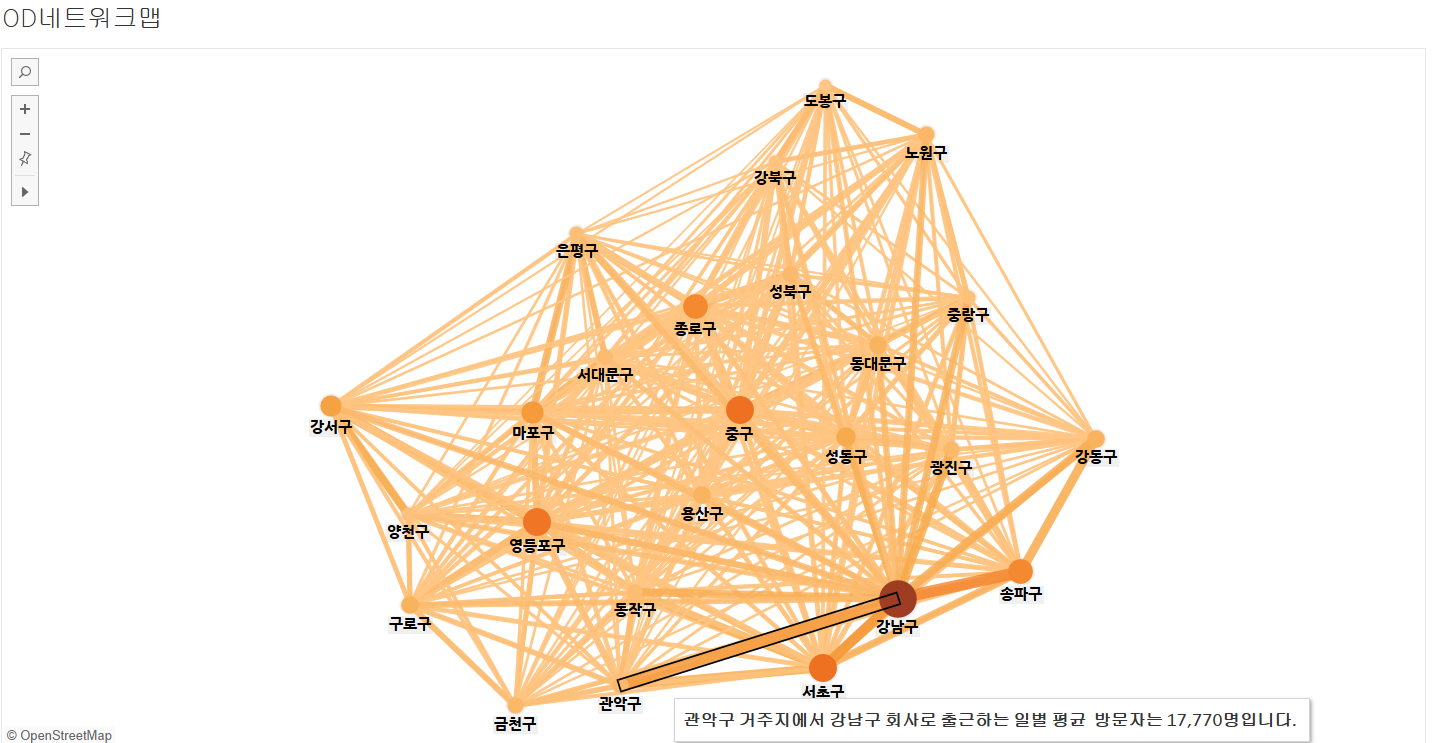

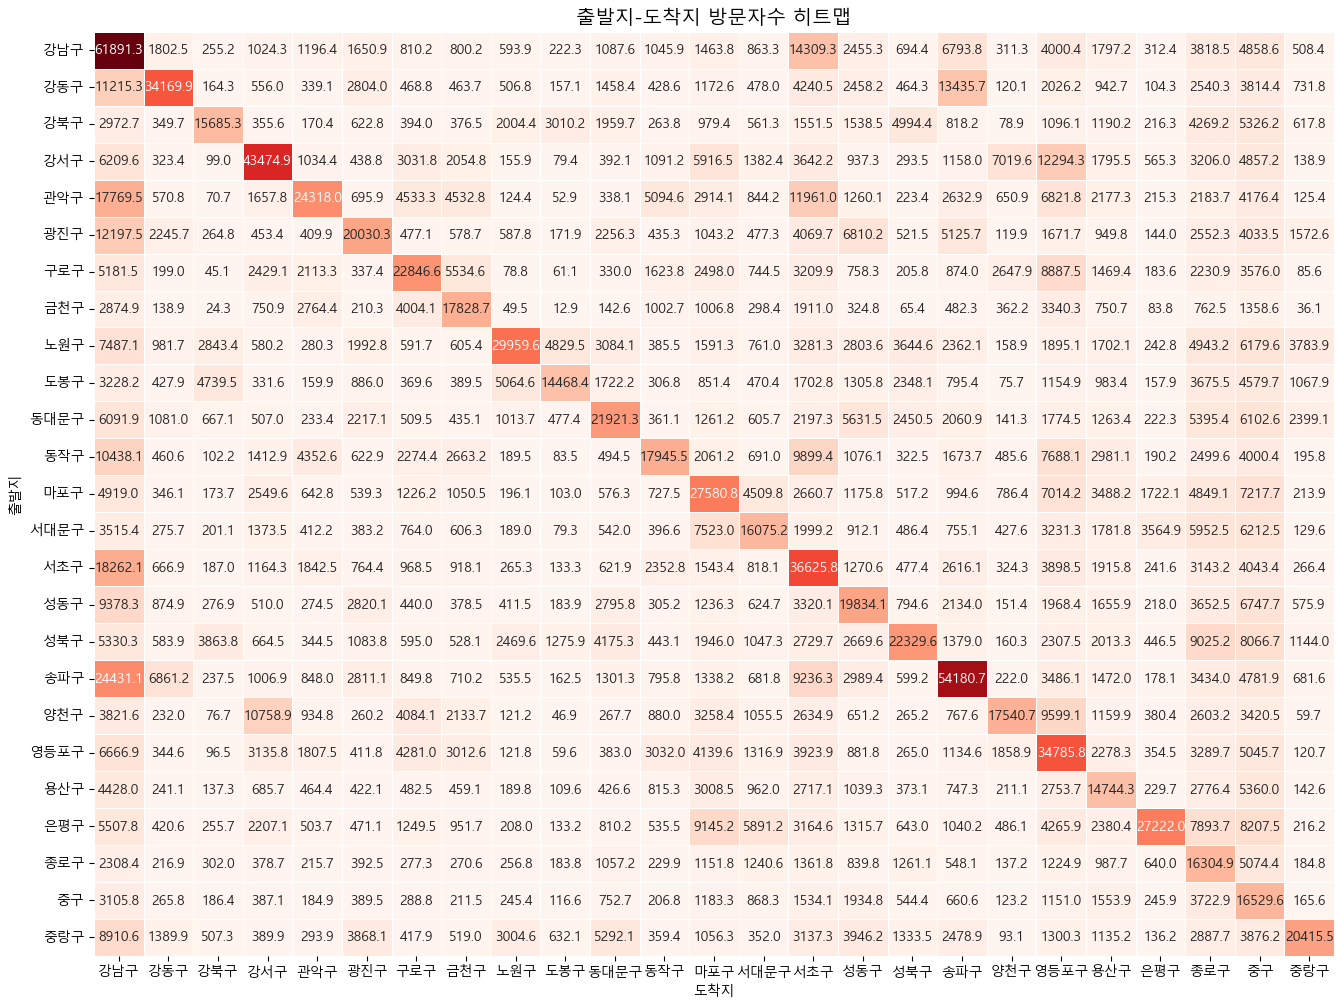

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

grouped_df = grouped.groupby(['sgg_nm_origin','sgg_nm_dest'])['cnt'].mean().reset_index()

# 피벗테이블 생성
pivot = grouped_df.pivot_table(index='sgg_nm_origin', columns='sgg_nm_dest', values='cnt', aggfunc='mean', fill_value=0)

# 히트맵 시각화
plt.figure(figsize=(16, 12))
sns.heatmap(pivot, annot=True, fmt='.1f', cmap = 'Reds', linewidths=0.5, cbar =False)
plt.title('출발지-도착지 방문자수 히트맵', fontsize=14)
plt.xlabel('도착지')
plt.ylabel('출발지')
plt.show()


- 강남구에서 근무하는 사람의 경우 강남, 송파,서초, 관악이 거주지인 사람이 많음
- 구로구에서 근무하는 사람의 경우 구로, 관악, 양천, 영등포가 거주지인 사람이 많음
- 대체적으로 회사가 있는 지역에 거주하는 경우가 많음

# **3.구로구와 강남구의 직장인 소득은 어떠할까?**

## 3-1. 소득구간 비율

In [10]:
import pandas as pd
rate_df = pd.read_csv('KCB_SIGNGU_DATA6_27_202410.csv')
# 서울시 추출
rate_df = rate_df[rate_df['SIGNGU_CD'].astype(str).str.startswith('11')].reset_index(drop=True).loc[:,'SIGNGU_NM':]
# 시군구명만 남기기
rate_df['SIGNGU_NM'] = rate_df['SIGNGU_NM'].apply(lambda x: x.split()[1])
rate_df = rate_df.drop('SIGNGU_CD',axis=1)
# 컬럼명 한글로 변경
rate_df.columns = ['시군구명','2천만원대','3천만원대','4천만원대','5천만원대','6천만원대','7천만원대','7천만원대 이상']
rate_df.head()

시군구명  2천만원대  3천만원대  4천만원대  5천만원대  6천만원대  7천만원대  7천만원대 이상
0  강남구   0.08   0.28   0.21   0.13   0.07   0.05      0.19
1  강동구   0.09   0.35   0.26   0.12   0.06   0.04      0.08
2  강북구   0.13   0.42   0.25   0.10   0.04   0.02      0.03
3  강서구   0.10   0.35   0.26   0.13   0.06   0.04      0.07
4  관악구   0.12   0.40   0.26   0.11   0.05   0.02      0.04

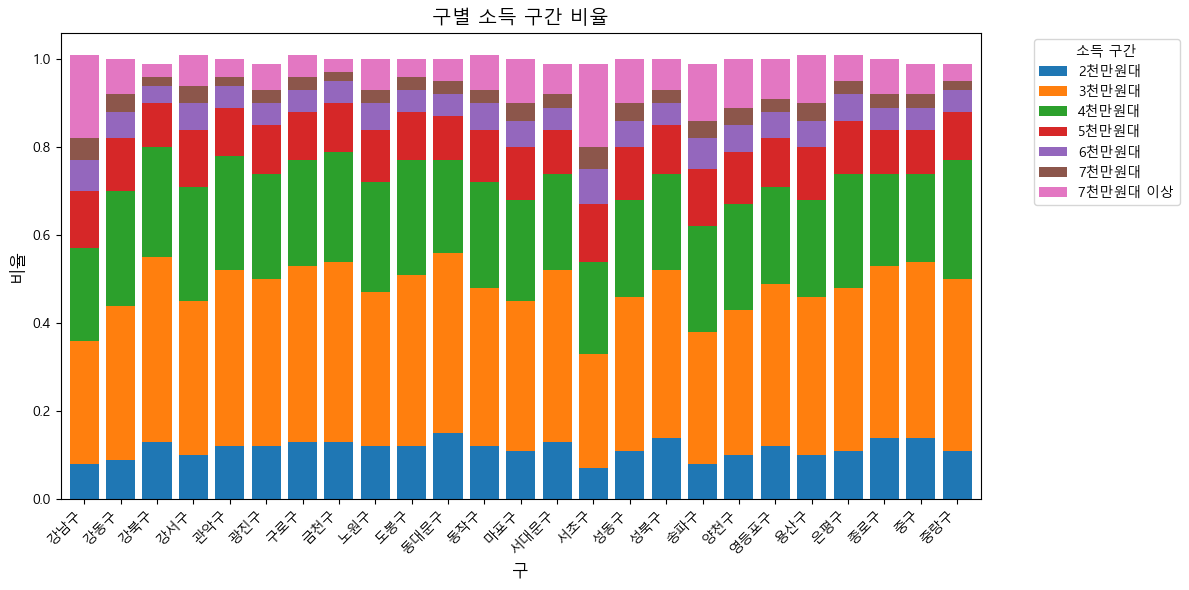

In [11]:
# 전 지역구 소득 구간 비율 시각화 
rate_df.set_index('시군구명').plot(kind='bar', stacked=True, figsize=(12, 6), width=0.8)
plt.title('구별 소득 구간 비율', fontsize=14)
plt.ylabel('비율', fontsize=12)
plt.xlabel('구', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='소득 구간', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

1. **강남구 직장인 비율이 높은 송파, 서초, 관악**
- 송파구: 3천만원대 소득이 가장 많고 다음으로 4천만원, 5천만원대 소득인 사람 비율이 많음
- 서초구: 3천만원대 소득이 가장 많으나 타 지역구의 비해 상대적으로 그 비중이 적으며 4천만원대와 7천만원대 이상의 소득이 그 다음으로 많음
- 관악구: 3천만원과 4천만원대 소득인 주민비율이 압도적으로 많고, 고소득으로 갈수록 그 비중이 적어짐

2. **구로구 직장인 비율이 높은 양천, 영등포**
- 양천구: 3천만원,4천만원, 5천만원대 비중이 높고 7천만원대 이상 비중이 상대적으로 낮지 않은 편
- 영등포구: 양천구에 비해 3천만원대인 주민 비율이 약간 높으나 양천구와 유사함

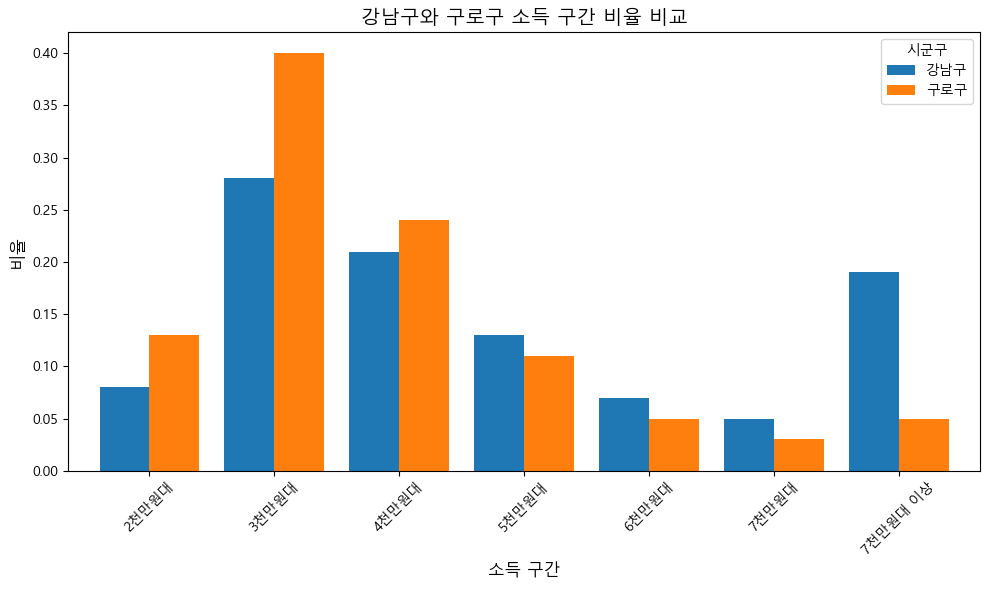

In [12]:
# 강남구와 구로구 데이터만 필터링
subset = rate_df[rate_df['시군구명'].isin(['강남구', '구로구'])].set_index('시군구명').T

subset.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('강남구와 구로구 소득 구간 비율 비교', fontsize=14)
plt.ylabel('비율', fontsize=12)
plt.xlabel('소득 구간', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='시군구')
plt.tight_layout()
plt.show()


- 4천만원대 까지는 구로구의 비중이 높으나 5천만원대 부터는 강남구의 비중이 높음
- 7천만원대 이상 비중이 구로구에 비해 압도적으로 높아 강남구에는 고소득 근로자가 구로구에 비해 상당히 많은 것을 알 수 있음.

## 3-2.평균 소득, 지출

In [19]:
import pandas as pd
df = pd.read_csv('서울시 상권분석서비스(소득소비-자치구).csv', encoding='ANSI').loc[:,'기준_년분기_코드':'지출_총금액']
df

기준_년분기_코드  행정동_코드 행정동_코드_명  월_평균_소득_금액  소득_구간_코드         지출_총금액
0        20231   11215      광진구     3192971         7    94779593000
1        20231   11440      마포구     3832436         8  1024107094000
2        20231   11530      구로구     2994059         7  1343755688000
3        20231   11560     영등포구     3604887         7   211409909000
4        20231   11620      관악구     2771927         6   115651078000
..         ...     ...      ...         ...       ...            ...
545      20232   11350      노원구     3195375         7   126013453000
546      20232   11410     서대문구     3417706         7   115632104000
547      20232   11650      서초구     4912401         9   622104358000
548      20232   11260      중랑구     2598785         6    67707226000
549      20232   11290      성북구     3281773         7    84121681000

[550 rows x 6 columns]

C:\Users\samsung-user\anaconda3\envs\univ\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\samsung-user\anaconda3\envs\univ\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\samsung-user\anaconda3\envs\univ\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\samsung-user\anaconda3\envs\univ\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: Whe

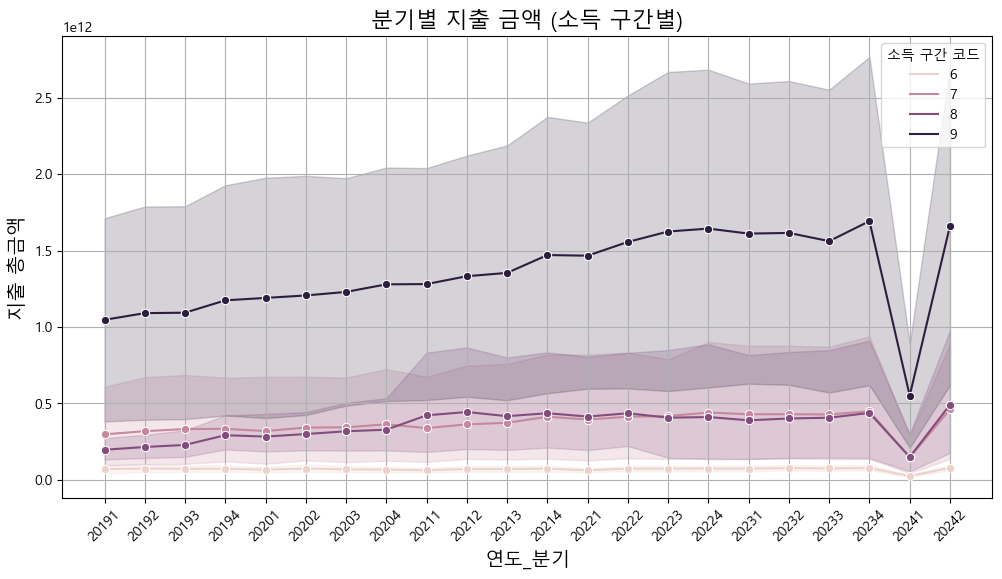

In [31]:
# 기준_년분기_코드를 문자열로 변환 (범주형으로 처리)
df['기준_년분기_코드'] = df['기준_년분기_코드'].astype(str)
ordered_quarters = sorted(df['기준_년분기_코드'].unique())  # 순서대로 정렬
df['기준_년분기_코드'] = pd.Categorical(df['기준_년분기_코드'], categories=ordered_quarters, ordered=True)

# Seaborn을 사용한 차트 생성
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df,
    x='기준_년분기_코드',
    y='지출_총금액',
    hue='소득_구간_코드',
    marker='o'
)

# 차트 꾸미기
plt.title('분기별 지출 금액 (소득 구간별)', fontsize=16)
plt.xlabel('연도_분기', fontsize=14)
plt.ylabel('지출 총금액', fontsize=14)
plt.legend(title='소득 구간 코드')
plt.grid(True)
plt.xticks(rotation=45)  # x축 레이블 회전
plt.show()

- 소득/지출 대시보드
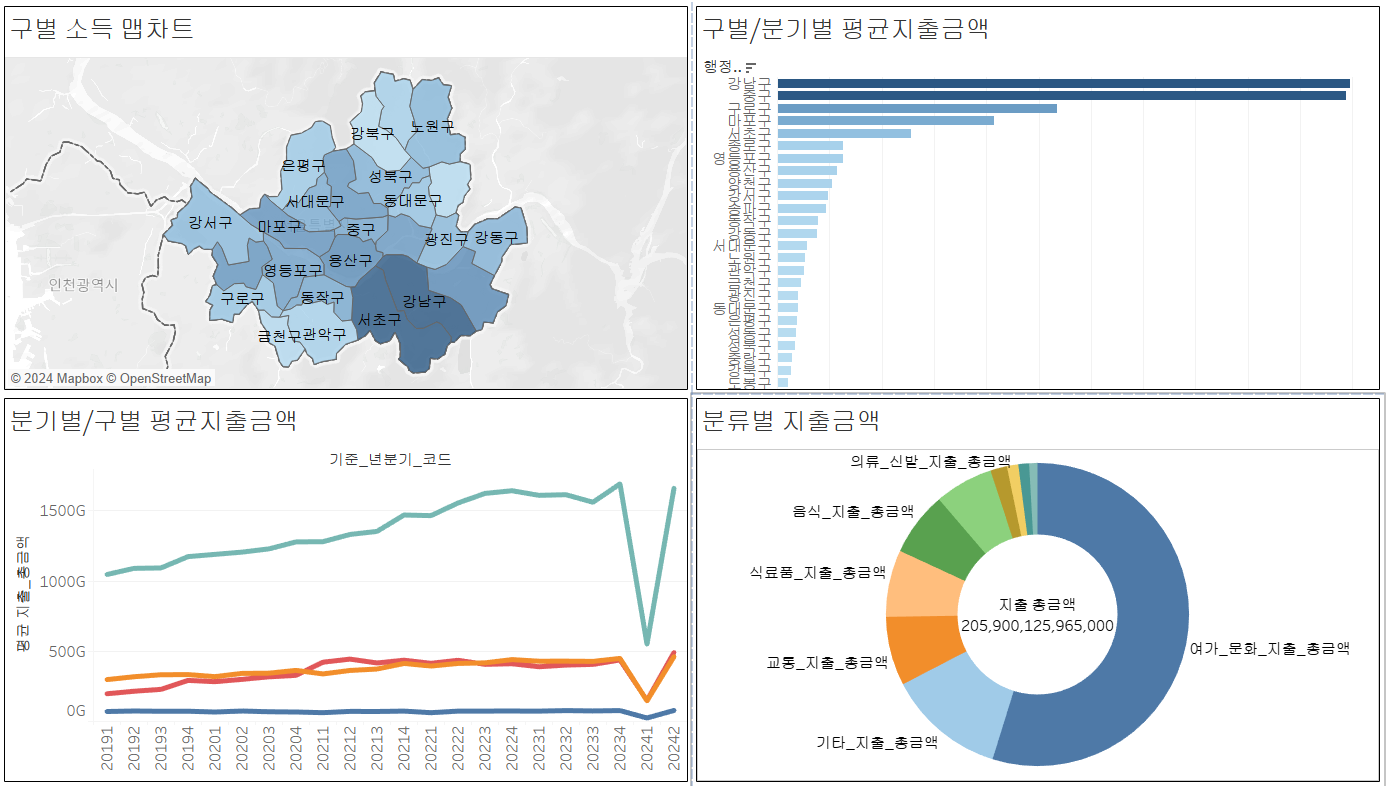

# **4. 실제로 평당 임대료 차이가 클까?**
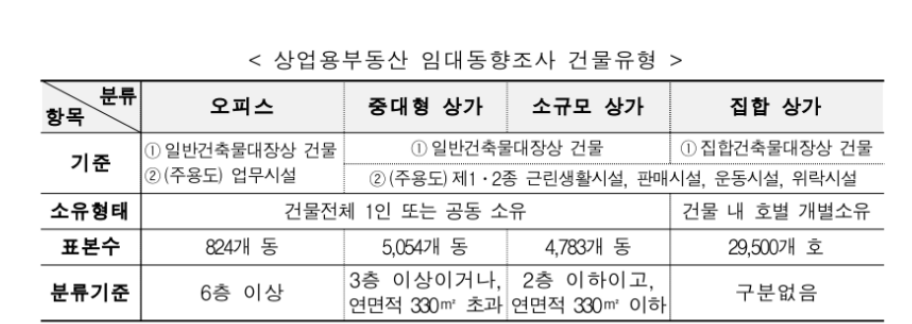

- 중대형 상가는 최소 3층 이상, 100평 이상의 건물을 칭할 때 사용

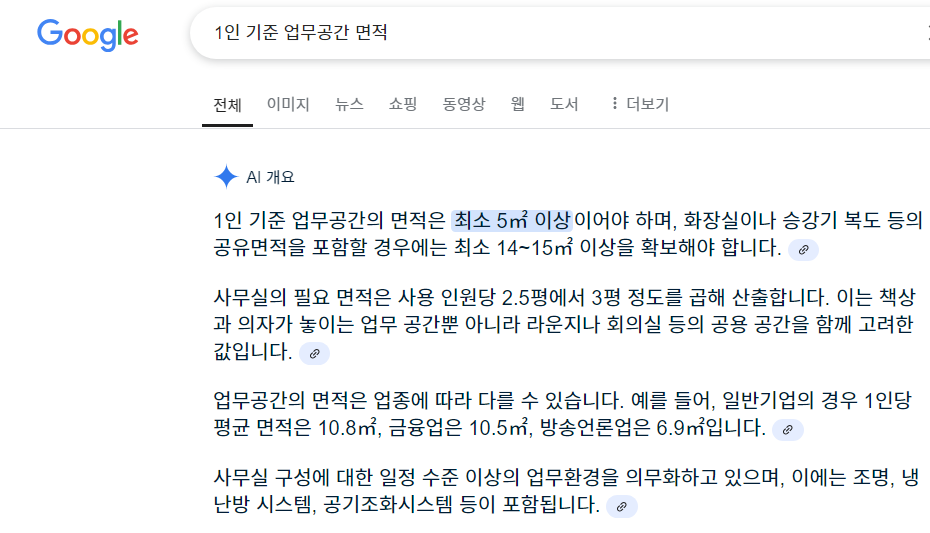

- 1인당 업무공간 면적은 법적인 표준은 없으나 일반적으로 2.5평 ~ 3평 정도를 기준으로 삼음
- 30인 기준 회사의 경우 3평으로 계산할 때 최소 100평 규모의 사무실이 필요함
- 내가 궁금한건 과연 강남구에서 소규모의 사업체가 운영할 수 있는 수준의 사무실 사이즈를 이용할 때, 구로구에서는 한 층을 이용할 수 있을까?
- 20인 중소기업 규모의 사업체가 있다고 할때, 공용면적까지해서 강남구에서 최소기준에 부합하는 약 80평 정도의 사무실을 이용한다면, 같은 가격으로 구로구에서는 어느 정도 사이즈로 이용할 수 있을까?

In [13]:
import pandas as pd
# 전처리한 서울 상업용 부동산 데이터 로드
df = pd.read_csv('상권별_상업용_중대형상가_임대료.csv').fillna('*')

df['연도'] = df['연도'].astype(str)
df['연도_분기']  = df.loc[:,'연도'] + '_' + df.loc[:,'기간']

df

시도 광역상권 하위상권  평당_임대료    연도   기간      층     연도_분기
0     서울    *    *   50909  2022  1분기   지하1층  2022_1분기
1     서울   도심    *   56859  2022  1분기   지하1층  2022_1분기
2     서울   도심  광화문   91570  2022  1분기   지하1층  2022_1분기
3     서울   도심  남대문   64132  2022  1분기   지하1층  2022_1분기
4     서울   도심  동대문   45619  2022  1분기   지하1층  2022_1분기
...   ..  ...  ...     ...   ...  ...    ...       ...
4153  서울    *  장안동   61150  2024  1분기  6-10층  2024_1분기
4154  서울    *   천호   39999  2024  1분기  6-10층  2024_1분기
4155  서울    *  청량리   36033  2024  1분기  6-10층  2024_1분기
4156  서울    *  혜화동   47272  2024  1분기  6-10층  2024_1분기
4157  서울    *   화곡   29752  2024  1분기  6-10층  2024_1분기

[4158 rows x 8 columns]

In [14]:
# 강남구 필터링
df_gangnam = df[(df['광역상권']=='강남')*(df['하위상권'] == '*')].reset_index(drop=True).drop('하위상권',axis=1)
df_gangnam = df_gangnam.rename(columns={'광역상권':'상권'})


# 구로구 필터링
df_guro = df[(df['하위상권']=='구로디지털단지역')].reset_index(drop=True).drop('광역상권',axis=1)
df_guro = df_guro.rename(columns={'하위상권':'상권'})

concat_df = pd.concat([df_gangnam,df_guro])
concat_df

시도        상권  평당_임대료    연도   기간      층     연도_분기
0   서울        강남   63471  2022  1분기   지하1층  2022_1분기
1   서울        강남  188099  2022  1분기     1층  2022_1분기
2   서울        강남   92892  2022  1분기     2층  2022_1분기
3   서울        강남   77685  2022  1분기     3층  2022_1분기
4   서울        강남   70743  2022  1분기     4층  2022_1분기
..  ..       ...     ...   ...  ...    ...       ...
58  서울  구로디지털단지역   63471  2024  1분기     2층  2024_1분기
59  서울  구로디지털단지역   42975  2024  1분기     3층  2024_1분기
60  서울  구로디지털단지역   38347  2024  1분기     4층  2024_1분기
61  서울  구로디지털단지역   71074  2024  1분기     5층  2024_1분기
62  서울  구로디지털단지역   61150  2024  1분기  6-10층  2024_1분기

[126 rows x 7 columns]

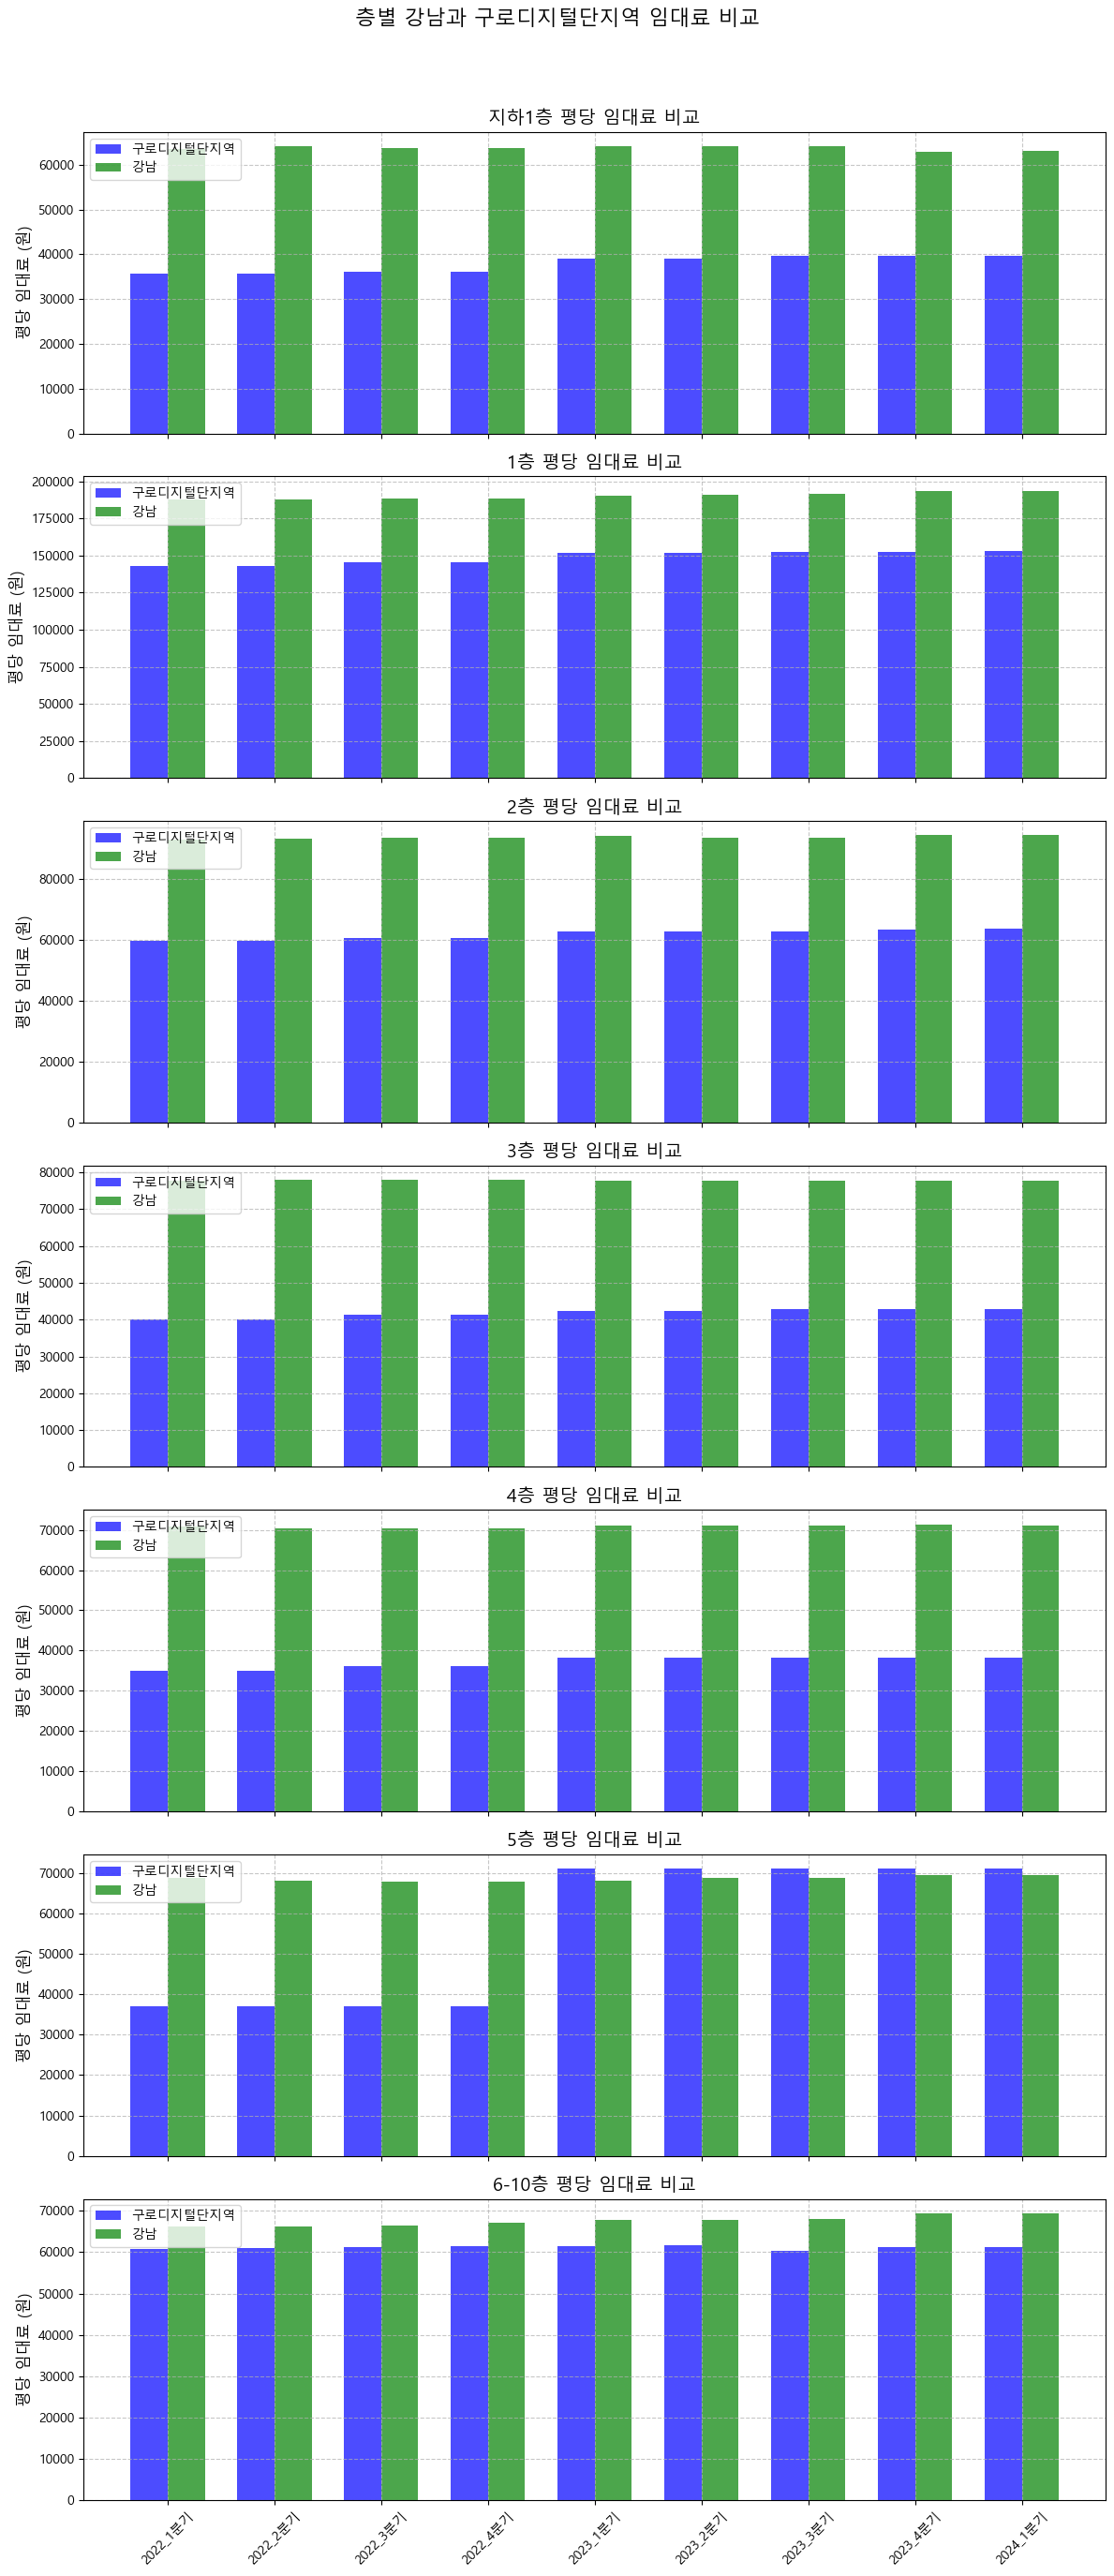

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False  # 음수 기호 깨짐 방지

# 층별 목록 가져오기
floors = concat_df['층'].unique()

# 그래프 생성
fig, axes = plt.subplots(len(floors), 1, figsize=(12, len(floors) * 4), sharex=True)
fig.suptitle('층별 강남과 구로디지털단지역 임대료 비교', fontsize=16)

# 층별 subplot
for idx, floor in enumerate(floors):
    ax = axes[idx]

    # 층별 데이터 필터링
    df_floor = concat_df[concat_df['층'] == floor]

    # x축 데이터와 막대 너비 설정
    x = np.arange(len(df_floor['연도_분기'].unique()))  # 분기별 위치
    width = 0.35  # 막대 너비

    # 강남과 구로 데이터
    guro_data = df_floor[df_floor['상권'] == '구로디지털단지역']['평당_임대료']
    gangnam_data = df_floor[df_floor['상권'] == '강남']['평당_임대료']

    # 그룹 막대그래프 생성
    ax.bar(x - width / 2, guro_data, width, label='구로디지털단지역', alpha=0.7, color='blue')
    ax.bar(x + width / 2, gangnam_data, width, label='강남', alpha=0.7, color='green')

    # 그래프 제목 및 축 설정
    ax.set_title(f'{floor} 평당 임대료 비교', fontsize=14)
    ax.set_ylabel('평당 임대료 (원)', fontsize=12)
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)

    # x축 설정
    ax.set_xticks(x)
    ax.set_xticklabels(df_floor['연도_분기'].unique(), rotation=45)

# 전체 레이아웃 조정 및 그래프 출력
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


- 층별/분기별 임대료 추이를 볼때 전반적으로 강남이 더 높은 임대료로 이루어짐
- 특히나 지하1층부터 4층 정도까지는 구로디지털단지역과 강남의 임대료 차이가 꽤나 높음
- 특이한 점은 구로의 5층 평당 임대료가 23년도를 기준으로 평당 임대료를 추월함. 구로구가 강남구보다 임대료가 높은 유일한 구간

## 4-1.강남구 30인 기준 100평 사무실 이용중인 회사가 구로구에서 한층 이용하는거 가능?
- 강남구와 구로구의 업무시설 평균 건축면적은 1989제곱미터로 약 600평 가량 (건축물대장_전처리_평균면적확인.ipynb 참고)
- 한 건물의 평수가 600평이라고 가정할때, 강남구에서 100평으로 사무실 이용중인 사업체가 구로구의 건물 한 층을 같은 임대료로 이용하는 것이 가능할까?

In [16]:
recent_df = concat_df[concat_df['연도_분기']=='2024_1분기']
recent_df =  recent_df

In [17]:
import pandas as pd

# 사용자 입력 받기
def compare_rent():
    print('강남구와 구로구 층별 임대료 비교')
    gn_floor = input('강남구에서 이용 중인 층을 입력하세요 (예: 1층, 2층, ..., 6-10층): ')
    gr_floor = input('구로구에서 확인할 층을 입력하세요 (예: 1층, 2층, ..., 6-10층): ')
    
    try:
        # 강남층과 구로층의 평당 임대료 가져오기
        gn_rental = recent_df[(recent_df['상권'] == '강남') & (recent_df['층'] == gn_floor)]['평당_임대료'].values[0]
        gr_rental = recent_df[(recent_df['상권'] == '구로디지털단지역') & (recent_df['층'] == gr_floor)]['평당_임대료'].values[0]
        
        # 강남 100평 임대료와 구로 600평 임대료 계산
        gn_100_rental = gn_rental * 100
        gr_600_rental = gr_rental * 600
        
        # 추가 비용 계산
        extra = gr_600_rental - gn_100_rental
        
        # 결과 출력
        print(f'\n강남 {gn_floor} 100평 임대료: {gn_100_rental:,} 원')
        print(f'구로 {gr_floor} 600평 임대료: {gr_600_rental:,} 원')
        
        if gn_100_rental >= gr_600_rental:
            print(f'\n강남 {gn_floor}의 100평 임대료로 구로 {gr_floor} 600평을 이용할 수 있습니다.')
        else:
            print(f'\n강남 {gn_floor}의 100평 임대료로 구로 {gr_floor} 600평을 이용할 수 없습니다.')
            print(f'구로 {gr_floor}을 이용하기 위해 추가로 월 임대료 {extra:,} 원이 필요합니다.')
    except IndexError:
        print('입력한 층이 잘못되었거나 데이터에 없습니다. 다시 확인해주세요.')

# 함수 실행
compare_rent()


강남구와 구로구 층별 임대료 비교


강남구에서 이용 중인 층을 입력하세요 (예: 1층, 2층, ..., 6-10층):  3층
구로구에서 확인할 층을 입력하세요 (예: 1층, 2층, ..., 6-10층):  3층



강남 3층 100평 임대료: 7,768,500 원
구로 3층 600평 임대료: 25,785,000 원

강남 3층의 100평 임대료로 구로 3층 600평을 이용할 수 없습니다.
구로 3층을 이용하기 위해 추가로 월 임대료 18,016,500 원이 필요합니다.


- 간단한 프로그램을 만들어 확인해본 결과 강남에서 100평 운영하는 사무실 임대료 정도로는 구로에서 한 층을 쓰기에는 어려움
- 교수님의 말씀에 과장이 있었던 것으로 결론